## Introduction
In this notebook, I’ll examine a dataset that includes variables on weather and fire risk for locations in Algerian forests from two different regions. By plotting and running multiple linear regressions, I’ll explore the relationships among variables including:

1. `temp` – maximum temperature in degrees Celsius
2. `humid` – relative humidity as a percentage
3. `region` – location in Bejaia in the northeast of Algeria or Sidi Bel-abbes in the northwest of Algeria
4. `fire` – whether a fire occurred (True) or didn’t (False)
5. `FFMC` – Fine Fuel Moisture Code: measure of forest litter fuel moisture that incorporates temperature, humidity, wind, and rain
6. `ISI` – Initial Spread Index: estimates spread potential of fire
7. `BUI` – Buildup Index: estimates potential release of heat
8. `FWI` – Fire Weather Index: measure of general fire intensity potential that incorporates ISI and BUI

## Dataset Citation
Faroudja ABID et al., Predicting Forest Fire in Algeria using Data Mining Techniques: Case Study of the Decision Tree Algorithm, International Conference on Advanced Intelligent Systems for Sustainable Development (AI2SD 2019) , 08 - 11 July , 2019, Marrakech, Morocco.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [5]:
df = pd.read_csv('dataset/forests.csv')
df.head()

,temp,humid,wind,rain,FFMC,DMC,DC,ISI,BUI,FWI,region,fire
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,Bejaia,False
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,Bejaia,False
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,Bejaia,False
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,Bejaia,False
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,Bejaia,False


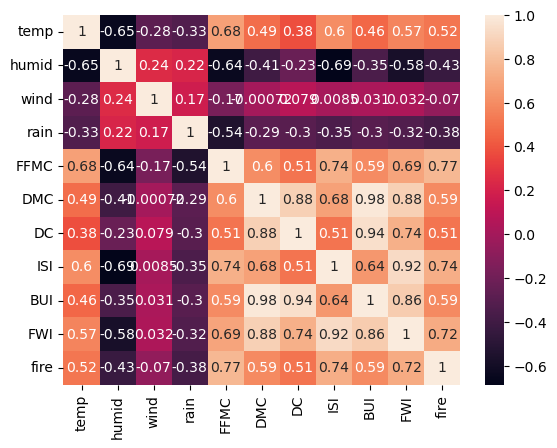

In [9]:
corr_grid = df.corr(numeric_only=True)
sns.heatmap(corr_grid, xticklabels=corr_grid.columns, yticklabels=corr_grid.columns, annot=True)
plt.show()

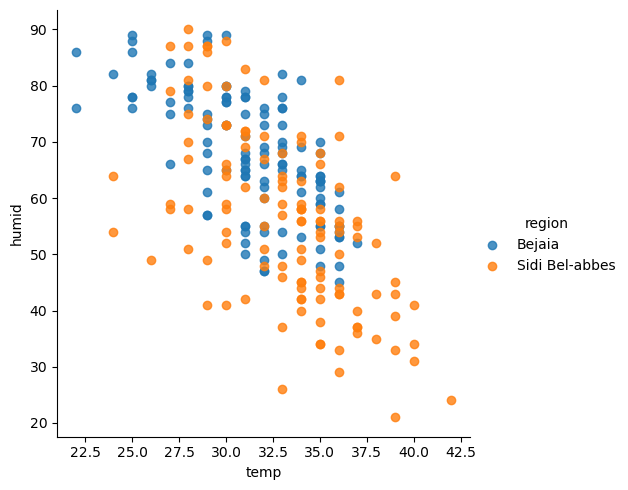

In [10]:
# plot humidity vs temperature
sns.lmplot(x='temp', y='humid', hue='region', data=df, fit_reg = False)
plt.show()

In [11]:
# model predicting humidity
modelH = sm.OLS.from_formula('humid ~ temp + region', data=df).fit()
print(modelH.params)

Intercept                   142.575801
region[T.Sidi Bel-abbes]     -7.247538
temp                         -2.392547
dtype: float64


Holding region constant, the coefficient on temperature indicates that for every temperature increase of one-degree Celsius, relative humidity decreases by 2.4%.

C:\Users\admin\AppData\Local\Temp\ipykernel_12784\1127912786.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df.temp, modelH.params[0]+modelH.params[1]*0+modelH.params[2]*df.temp, color='blue', linewidth=1.5, label='Bejaia')
C:\Users\admin\AppData\Local\Temp\ipykernel_12784\1127912786.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df.temp, modelH.params[0]+modelH.params[1]*1+modelH.params[2]*df.temp, color='orange', linewidth=1.5, label='Sidi Bel-abbes')


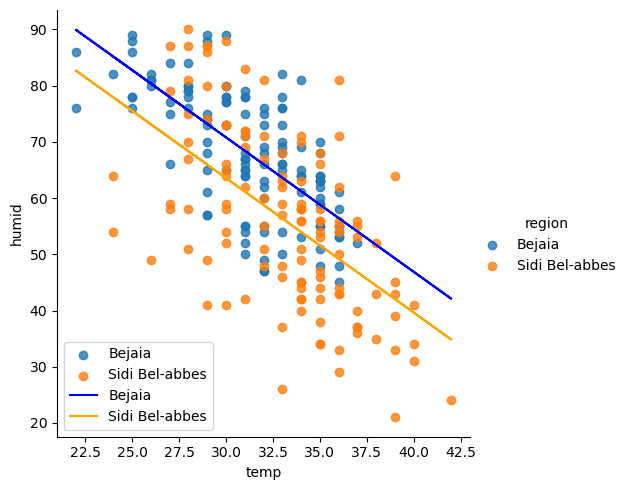

In [20]:
# plot regression lines
sns.lmplot(x='temp', y='humid', hue='region', data=df, fit_reg = False)
plt.plot(df.temp, modelH.params[0]+modelH.params[1]*0+modelH.params[2]*df.temp, color='blue', linewidth=1.5, label='Bejaia')
plt.plot(df.temp, modelH.params[0]+modelH.params[1]*1+modelH.params[2]*df.temp, color='orange', linewidth=1.5, label='Sidi Bel-abbes')
plt.legend()
plt.show()

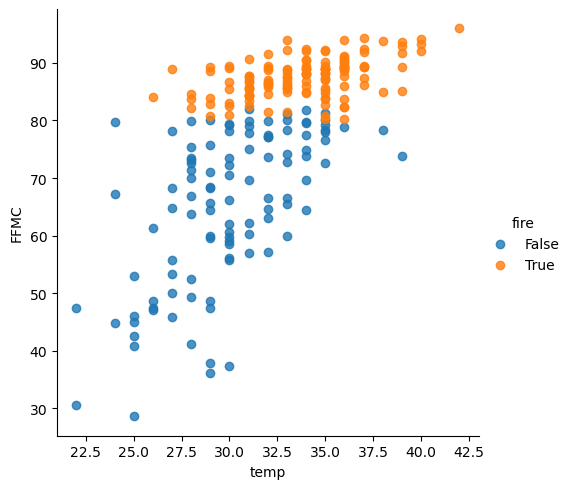

In [14]:
# plot FFMC vs temperature
sns.lmplot(x='temp', y='FFMC', hue='fire', data=df, fit_reg = False)
plt.show()

In [15]:
# model predicting FFMC with interaction
modelF = sm.OLS.from_formula('FFMC ~ temp + fire + temp:fire', data=df).fit()
print(modelF.params)

Intercept            -8.108891
fire[T.True]         76.788000
temp                  2.445159
temp:fire[T.True]    -1.887219
dtype: float64


For every temperature increase of one degree Celsius, FFMC score increases by 2.4 points. For every temperature increase of one degree Celsius, FFMC score increases by 0.5 points.

C:\Users\admin\AppData\Local\Temp\ipykernel_12784\354301292.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df.temp, modelF.params[0]+modelF.params[1]*0+modelF.params[2]*df.temp + modelF.params[3]*df.temp*0, color='blue', linewidth=1.5, label='No Fire')
C:\Users\admin\AppData\Local\Temp\ipykernel_12784\354301292.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df.temp, modelF.params[0]+modelF.params[1]*1+modelF.params[2]*df.temp + modelF.params[3]*df.temp*1, color='orange', linewidth=1.5, label='Fire')


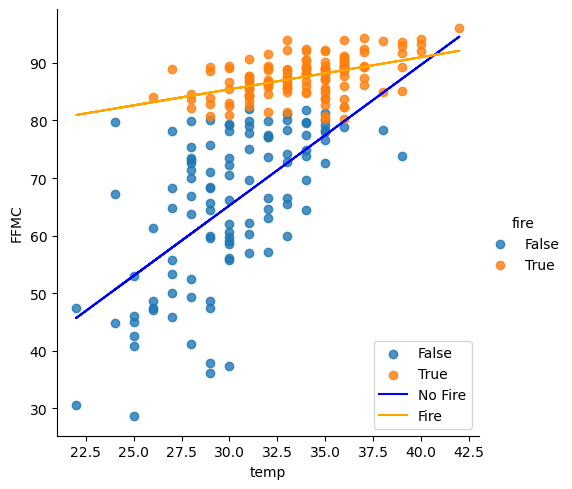

In [21]:
# plot regression lines
sns.lmplot(x='temp', y='FFMC', hue='fire', data=df, fit_reg = False)
plt.plot(df.temp, modelF.params[0]+modelF.params[1]*0+modelF.params[2]*df.temp + modelF.params[3]*df.temp*0, color='blue', linewidth=1.5, label='No Fire')
plt.plot(df.temp, modelF.params[0]+modelF.params[1]*1+modelF.params[2]*df.temp + modelF.params[3]*df.temp*1, color='orange', linewidth=1.5, label='Fire')
plt.legend()
plt.show()

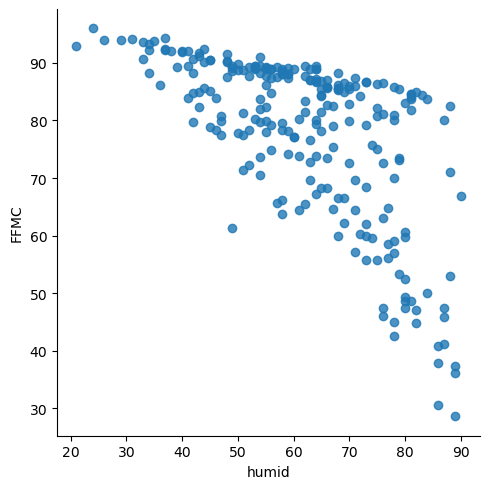

In [22]:
# plot FFMC vs humid
sns.lmplot(x='humid', y='FFMC', data=df, fit_reg = False)
plt.show()

In [23]:
# polynomial model predicting FFMC
modelP = sm.OLS.from_formula('FFMC ~ humid + np.power(humid,2)', data=df).fit()
print(modelP.params)

Intercept             77.634041
humid                  0.752165
np.power(humid, 2)    -0.011420
dtype: float64


In [25]:
# multiple variables to predict FFMC
modelFFMC = sm.OLS.from_formula('FFMC ~ temp + rain + wind + humid', data=df).fit()
print(modelFFMC.params)

Intercept    50.461574
temp          1.377774
rain         -2.614067
wind          0.419784
humid        -0.345373
dtype: float64


In [26]:
# predict FWI from ISI and BUI
modelFWI = sm.OLS.from_formula('FWI ~ ISI + BUI', data=df).fit()
print(modelFWI.params)

Intercept   -2.270676
ISI          1.133400
BUI          0.235526
dtype: float64
